In [44]:
import librosa
import librosa.display
import scipy.io.wavfile
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
from glob import glob
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import tqdm
import cv2
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
import numpy as np
import keras.backend as K
from scipy.spatial import distance
from PIL import Image
from keras.preprocessing import image
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm import tqdm,tqdm_pandas
import wave
from scipy.io import wavfile
import seaborn as sns
import IPython
train_data = pd.read_csv('D:/data_science/kaggle_sound_classification/train_with_feature.csv')
train_data = train_data.iloc[:,1:239]
train_data = np.array(train_data)
os.chdir('D:/data_science/kaggle_sound_classification')
os.getcwd()
train = pd.read_csv('train.csv')
y = train.label   
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
import xgboost as xgb
from sklearn import datasets, metrics, model_selection
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier
import pickle
from sklearn.model_selection import cross_val_score, StratifiedKFold
train_data = pd.read_csv('D:/data_science/kaggle_sound_classification/train_with_feature.csv')
train_data = train_data.iloc[:,1:239]
train_data = np.array(train_data)

In [4]:
mod = pickle.load(open("D:/data_science/kaggle_sound_classification/model/xg_boost_wogeid.dat", "rb"))

In [5]:
pred = mod.predict_proba(train_data)

In [8]:
class labelOnehotEnc():
    def __init__(self):
        self.le = LabelEncoder()
        self.oe = OneHotEncoder(sparse=False)   
    def label_fit(self,x):
        feature = self.le.fit_transform(x)
        self.oe = OneHotEncoder(sparse=False)
        return self.oe.fit_transform(feature.reshape(-1,1))
    def onehot_inverse(self,x):
        self.indecies = []
        for t in range(len(x)):
            ind = np.argmax((x[t]))
            self.indecies.append(ind)
        return self.le.inverse_transform(self.indecies)
    def inverse_label(self,x):
        return self.le.inverse_transform(x)

leohe = labelOnehotEnc()
y_enc = leohe.label_fit(y)

In [ ]:
cross_val_score(mod,train_data,y,scoring='neg_log_loss',cv=2).mean()

[21:32:05] Allocated 2MB on [0] GeForce GTX 1060 with Max-Q Design, 5054MB remaining.
[21:32:05] Allocated 0MB on [0] GeForce GTX 1060 with Max-Q Design, 5056MB remaining.
[21:32:05] Allocated 13MB on [0] GeForce GTX 1060 with Max-Q Design, 5042MB remaining.
[21:32:05] Allocated 8MB on [0] GeForce GTX 1060 with Max-Q Design, 5036MB remaining.
[21:34:34] Allocated 8MB on [0] GeForce GTX 1060 with Max-Q Design, 5019MB remaining.
[21:34:38] Allocated 2MB on [0] GeForce GTX 1060 with Max-Q Design, 5054MB remaining.
[21:34:38] Allocated 0MB on [0] GeForce GTX 1060 with Max-Q Design, 5056MB remaining.
[21:34:38] Allocated 13MB on [0] GeForce GTX 1060 with Max-Q Design, 5042MB remaining.
[21:34:38] Allocated 8MB on [0] GeForce GTX 1060 with Max-Q Design, 5036MB remaining.
[21:37:08] Allocated 8MB on [0] GeForce GTX 1060 with Max-Q Design, 5019MB remaining.


In [7]:
ipd.Audio('D:/data_science/kaggle_sound_classification/audio_train/00c9e799.wav')
wav = wave.open(f='D:/data_science/kaggle_sound_classification/audio_train/00c9e799.wav')
print('sampling_rate=',wav.getframerate())
print('Total samples=', wav.getnframes())
print('duration=', wav.getnframes()/wav.getframerate())

In [14]:
rate,data = wavfile.read(filename='D:/data_science/kaggle_sound_classification/audio_train/00c9e799.wav')
data.shape[0]/rate
plt.plot(data,'_',)

2.1

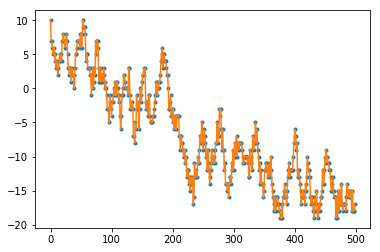

In [17]:
#Zooming 1000 frames
plt.plot(figsize = (16,4))
plt.plot(data[:500],'.',);plt.plot(data[:500],'-',)

In [53]:
#Classwise Distribuion of audio length
train_path = 'D:/data_science/kaggle_sound_classification/audio_train/'
train_files = glob(train_path + '*.wav')
train['fname'] = train_files
train['nframes'] = train['fname'].apply(lambda x: wave.open(x).getnframes())

In [64]:
#Classwise Distribuion of audio length
test_path = 'D:/data_science/kaggle_sound_classification/audio_test/'
test_files = glob(test_path + '*.wav')
test_files = pd.DataFrame(test_files)
nframes = test_files.iloc[:,0].apply(lambda x: wave.open(x).getnframes())

In [65]:
test_data = pd.read_csv('D:/data_science/kaggle_sound_classification/pred_submission/test_with_feature.csv')
test_data['length'] = nframes
test_data = test_data.iloc[:,1:240]
test_data = np.array(test_data)

In [67]:
test_data = pd.DataFrame(test_data)
test_data.to_csv('D:/data_science/kaggle_sound_classification/pred_submission/test_with_feature.csv')

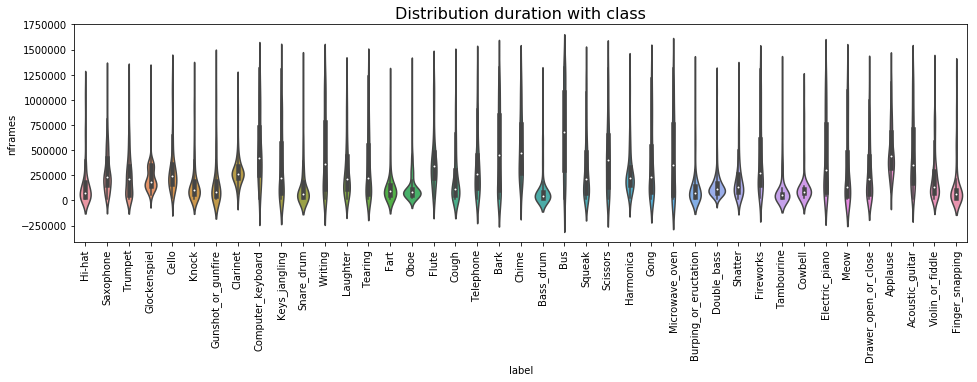

In [35]:
_, ax = plt.subplots(figsize = (16,4))
sns.violinplot(ax=ax,x='label', y='nframes',data=train)
plt.xticks(rotation=90)
plt.title('Distribution duration with class', fontsize = 16)
plt.show()

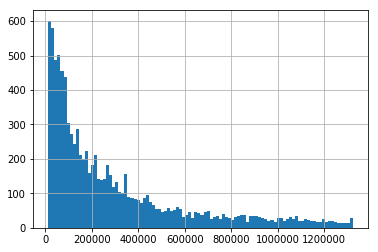

In [54]:
train['nframes'].hist(bins = 100)
train.to_csv('D:/data_science/kaggle_sound_classification/train_withlength.csv')

In [56]:
#Outlier analysis
nframe = [1000000,1200000]
for i in nframe:
    file = train.loc[train['nframes'] > i]
    print('number of clips length more than i:', file.shape[0])
    name = np.random.choice(file['fname'])
    IPython.display.display(ipd.Audio(name))
    print('playing for:', name)

number of clips length more than i: 525


playing for: D:/data_science/kaggle_sound_classification/audio_train\0969b5c5.wav
number of clips length more than i: 173


playing for: D:/data_science/kaggle_sound_classification/audio_train\23912d0e.wav


In [47]:
del file

In [40]:
train.loc[train['nframes'] > 1000000]

fname               label  \
9     D:/data_science/kaggle_sound_classification/au...   Computer_keyboard   
46    D:/data_science/kaggle_sound_classification/au...               Cello   
53    D:/data_science/kaggle_sound_classification/au...           Fireworks   
62    D:/data_science/kaggle_sound_classification/au...             Writing   
68    D:/data_science/kaggle_sound_classification/au...  Gunshot_or_gunfire   
73    D:/data_science/kaggle_sound_classification/au...              Squeak   
78    D:/data_science/kaggle_sound_classification/au...   Computer_keyboard   
89    D:/data_science/kaggle_sound_classification/au...                Fart   
97    D:/data_science/kaggle_sound_classification/au...       Keys_jangling   
132   D:/data_science/kaggle_sound_classification/au...      Electric_piano   
142   D:/data_science/kaggle_sound_classification/au...           Fireworks   
148   D:/data_science/kaggle_sound_classification/au...             Trumpet   
155   D:/data_science/kaggle_sound_classification/au...               Cough   
156   D:/data_science/kaggle_sound_classification/au...                Gong   
162   D:/data_science/kaggle_sound_classification/au...                Bark   
190   D:/data_science/kaggle_sound_classification/au...              Squeak   
212   D:/data_science/kaggle_sound_classification/au...   Computer_keyboard   
233   D:/data_science/kaggle_sound_classification/au...                Bark   
252   D:/data_science/kaggle_sound_classification/au...     Acoustic_guitar   
282   D:/data_science/kaggle_sound_classification/au...               Cello   
290   D:/data_science/kaggle_sound_classification/au...             Trumpet   
326   D:/data_science/kaggle_sound_classification/au...     Acoustic_guitar   
349   D:/data_science/kaggle_sound_classification/au...           Fireworks   
355   D:/data_science/kaggle_sound_classification/au...                Meow   
371   D:/data_science/kaggle_sound_classification/au...  Gunshot_or_gunfire   
385   D:/data_science/kaggle_sound_classification/au...               Cough   
387   D:/data_science/kaggle_sound_classification/au...             Writing   
392   D:/data_science/kaggle_sound_classification/au...              Squeak   
402   D:/data_science/kaggle_sound_classification/au...                Bark   
405   D:/data_science/kaggle_sound_classification/au...                Meow   
...                                                 ...                 ...   
8949  D:/data_science/kaggle_sound_classification/au...           Fireworks   
8950  D:/data_science/kaggle_sound_classification/au...            Clarinet   
8953  D:/data_science/kaggle_sound_classification/au...                Meow   
8954  D:/data_science/kaggle_sound_classification/au...               Cello   
8962  D:/data_science/kaggle_sound_classification/au...            Laughter   
8979  D:/data_science/kaggle_sound_classification/au...      Microwave_oven   
9000  D:/data_science/kaggle_sound_classification/au...            Laughter   
9034  D:/data_science/kaggle_sound_classification/au...              Hi-hat   
9045  D:/data_science/kaggle_sound_classification/au...              Squeak   
9060  D:/data_science/kaggle_sound_classification/au...             Writing   
9063  D:/data_science/kaggle_sound_classification/au...      Electric_piano   
9064  D:/data_science/kaggle_sound_classification/au...             Writing   
9127  D:/data_science/kaggle_sound_classification/au...             Writing   
9147  D:/data_science/kaggle_sound_classification/au...     Acoustic_guitar   
9179  D:/data_science/kaggle_sound_classification/au...            Laughter   
9194  D:/data_science/kaggle_sound_classification/au...             Tearing   
9207  D:/data_science/kaggle_sound_classification/au...           Fireworks   
9212  D:/data_science/kaggle_sound_classification/au...     Acoustic_guitar   
9239  D:/data_science/kaggle_sound_classification/au...                Meow   
9259  D:/data_science

In [41]:
np.random.choice(train['fname'])

'D:/data_science/kaggle_sound_classification/audio_train\\dfd3ad5c.wav'